<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 06 &mdash; Event-Based Backtesting**

## Applying the Classes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2515 non-null   float64
 1   return  2515 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB
None
             price    return
Date                        
2019-12-24  284.27  0.000950
2019-12-26  289.91  0.019646
2019-12-27  289.80 -0.000380
2019-12-30  291.52  0.005918
2019-12-31  293.65  0.007280


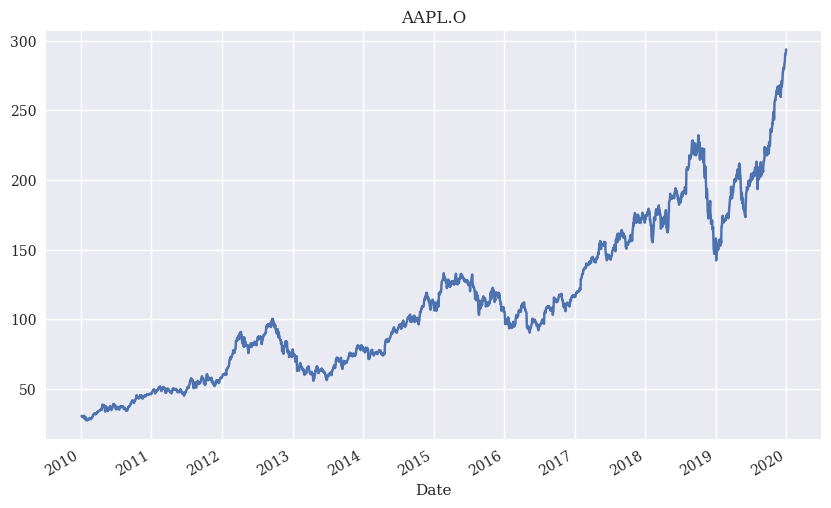

In [1]:
%run BacktestBase.py

In [2]:
%run BacktestLongOnly.py



Running SMA strategy | AAPL.O | SMA1=42 & SMA2=252
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 56204.95
Net Performance [%] 462.05


Running momentum strategy | AAPL.O | 60 days
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 136716.52
Net Performance [%] 1267.17


Running mean reversion strategy | AAPL.O | SMA=50 & thr=5
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 53907.99
Net Performance [%] 439.08


Running SMA strategy | AAPL.O | SMA1=42 & SMA2=252
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 51959.62
Net Performance [%] 419.60


Running momentum strategy | AAPL.O | 60 days
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 38074.26
Net Performance [%] 280.74


Running mean reversion strategy | AAPL.O | SMA=50 & thr=5
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 15375.48
Net Performance [%] 53.75


In [3]:
%run BacktestLongShort.py



Running SMA strategy | EUR= | SMA1=42 & SMA2=252
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 12592.41
Net Performance [%] 25.92


Running momentum strategy | EUR= | 60 days
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] -4304.88
Net Performance [%] -143.05


Running mean reversion strategy | EUR= | SMA=50 & thr=5
fixed costs 0.0 | proportional costs 0.0
Final balance   [$] 5695.36
Net Performance [%] -43.05


Running SMA strategy | AAPL.O | SMA1=42 & SMA2=252
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 38369.65
Net Performance [%] 283.70


Running momentum strategy | AAPL.O | 60 days
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] 6883.45
Net Performance [%] -31.17


Running mean reversion strategy | AAPL.O | SMA=50 & thr=5
fixed costs 10.0 | proportional costs 0.01
Final balance   [$] -5110.97
Net Performance [%] -151.11


## Financial Data Class

In [4]:
import numpy as np
import pandas as pd

In [5]:
url = 'http://hilpisch.com/pyalgo_eikon_eod_data.csv'

In [6]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [8]:
class FinancialData:
    def __init__(self, symbol):
        self.symbol = symbol
        self.retrieve_data()
        self.prepare_data()
    def retrieve_data(self):
        self.raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data['r'] = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = self.symbol
        self.data[cols].plot(figsize=(10, 6), title=f'{self.symbol}')

In [9]:
fd = FinancialData('EUR=')

In [10]:
fd.raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [11]:
fd.data.head()

,EUR=,r
Date,,
2010-01-04,1.4411,NaN
2010-01-05,1.4368,-0.002988
2010-01-06,1.4412,0.003058
2010-01-07,1.4318,-0.006544
2010-01-08,1.4412,0.006544


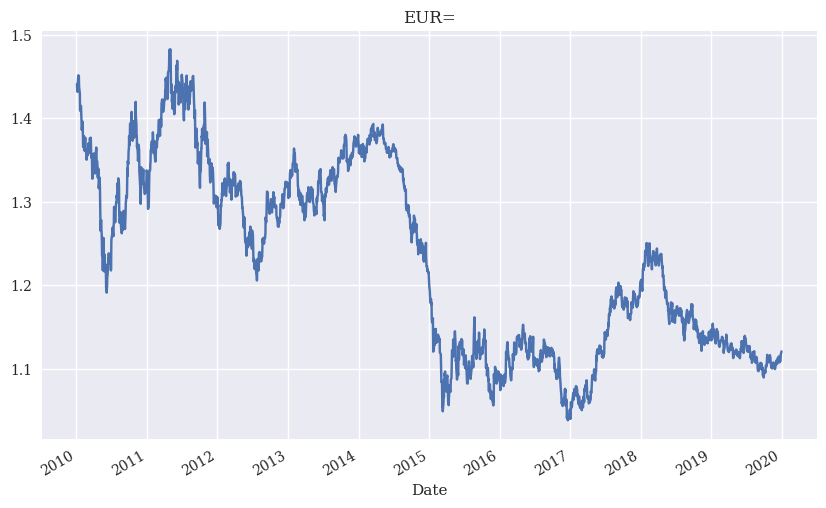

In [12]:
fd.plot_data()

## Event-Based View

... or thinking in **bars**.

In [13]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [14]:
import time
import random

In [15]:
for bar in range(10):
    print(bar)
    time.sleep(random.random() * 2)

0
1
2
3
4
5
6
7
8
9


In [16]:
fd.data.head()

,EUR=,r
Date,,
2010-01-04,1.4411,NaN
2010-01-05,1.4368,-0.002988
2010-01-06,1.4412,0.003058
2010-01-07,1.4318,-0.006544
2010-01-08,1.4412,0.006544


In [17]:
for bar in range(10):
    print(bar, str(fd.data.index[bar])[:10], fd.data[fd.symbol].iloc[bar])
    time.sleep(random.random() * 2)

0 2010-01-04 1.4411
1 2010-01-05 1.4368
2 2010-01-06 1.4412
3 2010-01-07 1.4318
4 2010-01-08 1.4412
5 2010-01-11 1.4513
6 2010-01-12 1.4494
7 2010-01-13 1.451
8 2010-01-14 1.4502
9 2010-01-15 1.4382


In [18]:
int(5000 / 1.4368)

3479

## Backtesting Base Class

In [19]:
class BacktestBase(FinancialData):
    def __init__(self, symbol, amount, verbose=False):
        super(BacktestBase, self).__init__(symbol)
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.verbose= verbose
    def get_date_price(self, bar):
        date = str(self.data.index[bar])[:10]
        price = self.data[self.symbol].iloc[bar]
        return date, price
    def print_current_balance(self, bar):
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance = {self.current_balance:.2f}')
    def print_net_wealth(self, bar):
        date, price = self.get_date_price(bar)
        net_wealth = self.current_balance + self.units * price
        print(f'{date} | net wealth = {net_wealth:.2f}')
    def place_buy_order(self, bar, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if amount is not None:
            units = int(amount / price)
        self.current_balance -= units * price
        self.units += units
        self.trades += 1
        if self.verbose:
            print(f'{date} | buying {units} for {price}')
    def place_sell_order(self, bar, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if amount is not None:
            units = int(amount / price)
        self.current_balance += units * price
        self.units -= units
        self.trades += 1
        if self.verbose:
            print(f'{date} | selling {units} for {price}')
    def close_out(self, bar):
        date, price = self.get_date_price(bar)
        print(58 * '=')
        print(f'{date} | *** CLOSING OUT FINAL POSITION ***')
        self.current_balance += self.units * price
        print(f'{date} | closing out position of {self.units} for {price}')
        self.units = 0
        self.trades += 1
        perf = (self.current_balance - self.initial_balance) / self.initial_balance * 100
        self.print_current_balance(bar)
        print(f'{date} | net performance [%] = {perf:.2f}')
        print(f'{date} | # of trades executed = {self.trades}')
        print(58 * '=')

In [20]:
bb = BacktestBase('EUR=', 10000)

In [21]:
# bb.raw.head()

In [22]:
bb.get_date_price(100)

('2010-05-27', np.float64(1.2368))

In [23]:
bb.print_current_balance(100)

2010-05-27 | current balance = 10000.00


In [24]:
bb.print_net_wealth(100)

2010-05-27 | net wealth = 10000.00


In [25]:
bb.place_buy_order(105, units=100)

In [26]:
bb.print_current_balance(105)

2010-06-04 | current balance = 9880.27


In [27]:
bb.print_net_wealth(105)

2010-06-04 | net wealth = 10000.00


In [28]:
bb.print_net_wealth(150)

2010-08-09 | net wealth = 10012.59


In [29]:
bb.place_buy_order(200, amount=1000)

In [30]:
bb.print_current_balance(200)

2010-10-19 | current balance = 8880.58


In [31]:
bb.print_net_wealth(200)

2010-10-19 | net wealth = 10017.59


In [32]:
bb.units

828

In [33]:
bb.place_sell_order(300, units=228)

In [34]:
bb.print_current_balance(300)

2011-03-14 | current balance = 9199.55


In [35]:
bb.print_net_wealth(300)

2011-03-14 | net wealth = 10038.95


In [36]:
bb.units

600

In [37]:
bb.close_out(500)

2011-12-27 | *** CLOSING OUT FINAL POSITION ***
2011-12-27 | closing out position of 600 for 1.3068
2011-12-27 | current balance = 9983.63
2011-12-27 | net performance [%] = -0.16
2011-12-27 | # of trades executed = 4


## Long Short Strategy Class

In [38]:
class SMALongShort(BacktestBase):
    
    def prepare_statistics(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
    
    def run_strategy(self, SMA1, SMA2):
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_statistics()
        self.position = 0
        self.trades = 0
        self.units = 0
        self.current_balance = self.initial_balance
        print(58 * '=')
        print(f'*** BACKTESTING STRATEGY ***')
        print(f'{self.symbol} | SMA1={self.SMA1} | SMA2={self.SMA2}')
        print(58 * '=')
        for bar in range(self.SMA2 - 1, len(self.data) - 1):
            trade = False
            if self.position in [0, -1]:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.place_buy_order(bar, units=(1 - self.position) * 5000)
                    self.position = 1
                    trade = True
            elif self.position in [0, 1]:
                if self.data['SMA1'].iloc[bar] < self.data['SMA2'].iloc[bar]:
                    self.place_sell_order(bar, units=(1 + self.position) * 5000)
                    self.position = -1
                    trade = True
            if trade and self.verbose:
                self.print_current_balance(bar)
                self.print_net_wealth(bar)
                print(58 * '-')
        self.close_out(bar)

In [39]:
sma = SMALongShort('EUR=', 10000, verbose=False)

In [40]:
sma.run_strategy(30, 180)

*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=180
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 10536.50
2019-12-30 | net performance [%] = 5.37
2019-12-30 | # of trades executed = 19


In [41]:
list(zip([30, 30, 42, 42], [180, 252, 180, 252]))

[(30, 180), (30, 252), (42, 180), (42, 252)]

In [42]:
for SMA1, SMA2 in zip([30, 30, 42, 42], [180, 252, 180, 252]):
    sma.run_strategy(SMA1, SMA2)

*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=180
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 10536.50
2019-12-30 | net performance [%] = 5.37
2019-12-30 | # of trades executed = 19
*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=252
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 11494.00
2019-12-30 | net performance [%] = 14.94
2019-12-30 | # of trades executed = 13
*** BACKTESTING STRATEGY ***
EUR= | SMA1=42 | SMA2=180
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 11000.50
2019-12-30 | net performance [%] = 10.01
2019-12-30 | # of trades executed = 17
*** BACKTESTING STRATEGY ***
EUR= | SMA1=42 | SMA2=252
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | 

In [43]:
from itertools import product

In [44]:
list(product(range(30, 51, 10), range(180, 261, 20)))

[(30, 180),
 (30, 200),
 (30, 220),
 (30, 240),
 (30, 260),
 (40, 180),
 (40, 200),
 (40, 220),
 (40, 240),
 (40, 260),
 (50, 180),
 (50, 200),
 (50, 220),
 (50, 240),
 (50, 260)]

In [45]:
for SMA1, SMA2 in product(range(30, 51, 10), range(180, 261, 20)):
    sma.run_strategy(SMA1, SMA2)

*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=180
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 10536.50
2019-12-30 | net performance [%] = 5.37
2019-12-30 | # of trades executed = 19
*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=200
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 11329.00
2019-12-30 | net performance [%] = 13.29
2019-12-30 | # of trades executed = 15
*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=220
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | current balance = 11024.00
2019-12-30 | net performance [%] = 10.24
2019-12-30 | # of trades executed = 13
*** BACKTESTING STRATEGY ***
EUR= | SMA1=30 | SMA2=240
2019-12-30 | *** CLOSING OUT FINAL POSITION ***
2019-12-30 | closing out position of -5000 for 1.1197
2019-12-30 | 

In [46]:
sma.data[252-3:252+3]

,EUR=,r,SMA1,SMA2
Date,,,,
2010-12-29,1.3223,0.008049,1.352294,NaN
2010-12-30,1.3281,0.004377,1.351392,NaN
2010-12-31,1.3377,0.007202,1.350218,NaN
2011-01-03,1.3351,-0.001946,1.349080,NaN
2011-01-04,1.3301,-0.003752,1.347784,NaN
2011-01-05,1.3151,-0.011341,1.346160,NaN


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>